In [ ]:
#IMPORT THE LIBRARIES REQUIRED
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#LOAD THE DATA
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
               'Ankle boot']

In [ ]:
print('The shape of train data:', train_images.shape)
print('The shape of test data:', test_images.shape)

The shape of train data: (60000, 28, 28)
The shape of test data: (10000, 28, 28)


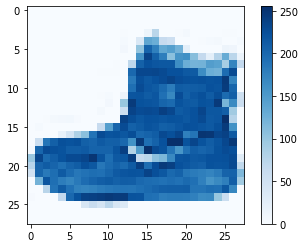

In [ ]:
#VISUALISATION OF SOME IMAGES

plt.figure()
plt.imshow(train_images[0],cmap='Blues')
plt.colorbar()
plt.show()

#This is ankle boot

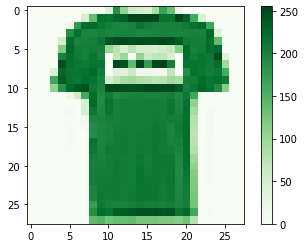

In [ ]:
plt.figure()
plt.imshow(train_images[1],cmap='Greens')
plt.colorbar()
plt.show()

#This is T-shirt/top

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

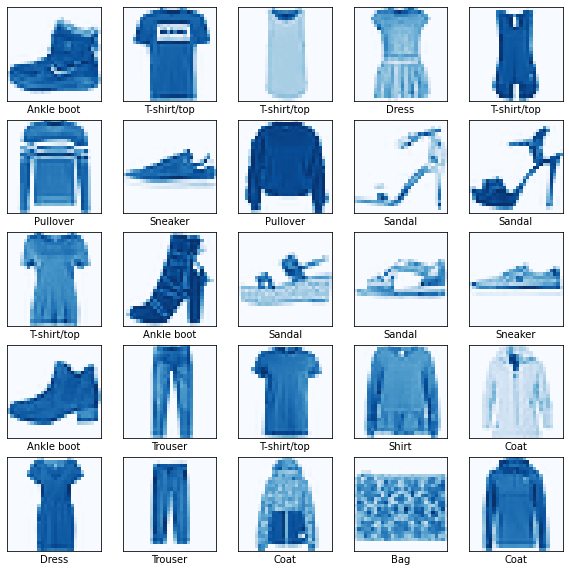

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(train_images[i], cmap='Blues')
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
#BUILDING A Sequential MODEL

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #2D image is flattened into 1D i.e. 28*28=784
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
])

In [ ]:
# OPTIMISE THE MODEL

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [ ]:
#FIT THE MODEL

model.fit(train_images,train_labels,batch_size=128,epochs=10)

Epoch 1/10
469/469 [==============================] - 6s 11ms/step - loss: 0.5489 - accuracy: 0.8119
Epoch 2/10
469/469 [==============================] - 10s 20ms/step - loss: 0.4048 - accuracy: 0.8571
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.3635 - accuracy: 0.8706
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3383 - accuracy: 0.8783
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.3169 - accuracy: 0.8857
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.3038 - accuracy: 0.8904
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2917 - accuracy: 0.8934
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2785 - accuracy: 0.8990
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2697 - accuracy: 0.9022
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2604 - accuracy: 0

In [ ]:
#EVALUATE THE MODEL BASED ON ACCURACY

test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3345 - accuracy: 0.8839 - 709ms/epoch - 2ms/step

Test accuracy: 0.883899986743927


In [ ]:
#PLOT PREDICTIONS OF MODEL AGAINST THE ORIGINAL TEST IMAGE

probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

This code creates a new sequential model probability_model by stacking the original model and a Softmax layer.

The original model is passed as an argument to the tf.keras.Sequential function, which creates a new model with the same layers as the original model. This new model is then passed as the first layer to the probability_model.

The Softmax layer is added to the end of the probability_model using the tf.keras.layers.Softmax() function. The Softmax layer applies the softmax function to the output of the previous layer, which converts the output to a probability distribution over the different classes.

So the resulting probability_model takes an input image and outputs a probability distribution over the 10 classes. The predicted class is the one with the highest probability.

In [ ]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


This code uses the probability_model to make predictions on the test_images.

The predict method is called on the probability_model with test_images as the argument. This returns an array of predicted probability distributions for each image in the test_images dataset.

Each predicted probability distribution is an array of 10 values, where each value represents the probability of the corresponding class label. For example, the first value in the array represents the probability that the image is a "T-shirt/top", the second value represents the probability that the image is a "Trouser", and so on.

The predictions array is assigned to the result of the predict method call, and can be used to evaluate the accuracy of the model and to generate plots of the predicted classes and probabilities for each image.

In [ ]:
np.argmax(predictions[0])

9

np.argmax(predictions[0]) is a NumPy function that returns the index of the maximum value in an array.

In this code, it is used to find the index of the class with the highest predicted probability for the first image in the test_images dataset.

The predictions array contains the predicted probability distributions for all the images in the test_images dataset, so predictions[0] retrieves the predicted probability distribution for the first image.

np.argmax(predictions[0]) then returns the index of the highest probability value in the predicted probability distribution. This index represents the predicted class label for the first image.

So np.argmax(predictions[0]) returns a single integer value between 0 and 9, representing the predicted class label for the first image in the test_images dataset.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color='red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100*np.max(predictions_array),
                                  class_names[true_label]),
                                  color = color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10),predictions_array, color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


These are two helper functions for plotting images and their corresponding prediction probabilities from a trained model.

The plot_image function takes four inputs: i which is the index of the image to plot, predictions_array which is an array of prediction probabilities for each class output by the model, true_label which is the true label of the image, and img which is the image array itself.

The function first sets up the plot by turning off the grid and ticks, and displaying the image with a binary colormap. It then determines the predicted label by finding the class with the highest prediction probability using np.argmax. If the predicted label matches the true label, the label text is colored blue, otherwise it is colored red.

The plot_value_array function takes three inputs: i which is the index of the image to plot, predictions_array which is an array of prediction probabilities for each class output by the model, and true_label which is the true label of the image.

This function sets up the plot by turning off the grid and setting the ticks to display the class labels. It then creates a bar plot of the prediction probabilities, colored gray, with the predicted label colored red and the true label colored blue. The y-axis limits are set to [0,1].

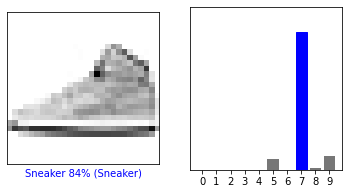

In [ ]:
i = 45
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i],test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

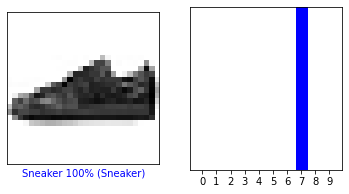

In [ ]:
i = 22
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i],test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

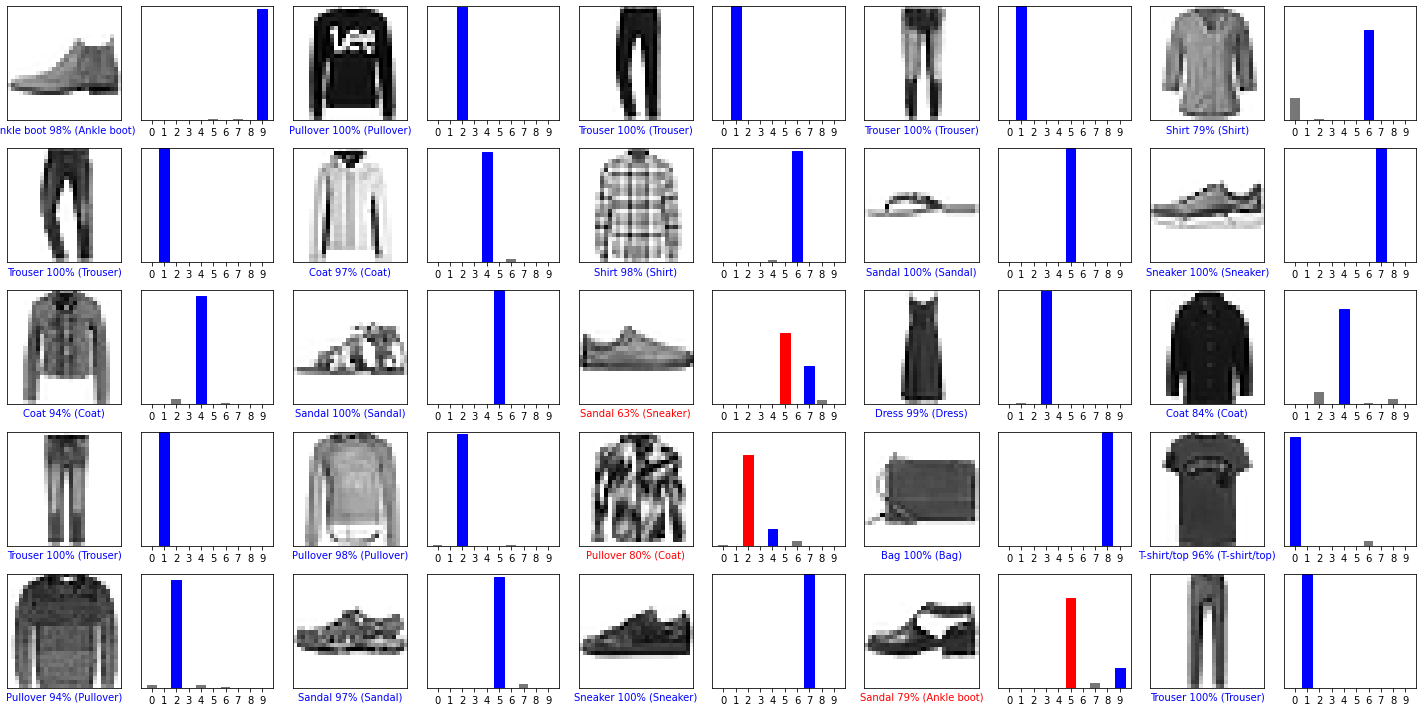

In [ ]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

This code is used to plot a grid of images with their corresponding prediction probabilities.

The first three lines set the number of rows, columns, and images to display in the grid.

The plt.figure function sets the size of the plot figure based on the number of rows and columns.

The for loop iterates over each image to plot. For each image, it first sets up a subplot with plt.subplot. The first argument specifies the number of rows in the grid, the second argument specifies the number of columns, and the third argument specifies the index of the current subplot. The index is calculated using the formula 2*i+1 for the image subplot and 2*i+2 for the probability subplot.

The plot_image function is then called with the current image index, the array of prediction probabilities for that image, the true label of the image, and the image itself as arguments. This plots the image and adds the predicted label and probability to the plot.

The plot_value_array function is then called with the same arguments as plot_image. This plots the bar chart of prediction probabilities with the true label and predicted label highlighted.

Finally, plt.tight_layout() is called to adjust the layout of the subplots so they don't overlap, and plt.show() is called to display the plot.




